In [1]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("Acoustic_Extinguisher_Fire_Dataset.csv")
df=df.dropna()

In [7]:
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5,0
17438,7,lpg,190,84,2.0,4,0
17439,7,lpg,190,80,1.5,3,0
17440,7,lpg,190,76,0.4,2,0


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['FUEL'] = encoder.fit_transform(df['FUEL'])
df



In [9]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
arr = s.fit_transform(df.iloc[:,:-1])

In [10]:
X = df.iloc[:,:6]
Y = df.iloc[:,6]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3)

In [12]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score,classification_report
acc = accuracy_score(y_test, y_pred)
print(acc)

0.8874450601949169


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2626
           1       0.90      0.87      0.88      2607

    accuracy                           0.89      5233
   macro avg       0.89      0.89      0.89      5233
weighted avg       0.89      0.89      0.89      5233



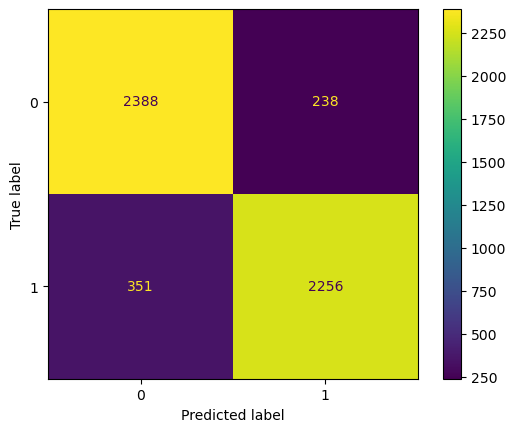

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels = model.classes_)
cmd.plot()